In [38]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
pyber_read_city_df = pd.read_csv(city_data_to_load)
pyber_read_city_df.head()

pyber_read_ride_df = pd.read_csv(ride_data_to_load)
pyber_read_ride_df.head()

# Combine the data into a single dataset
combined_pyber_df = pd.merge(pyber_read_ride_df,pyber_read_city_df,
                             how = "left", on = "city")

# Display the data table for preview
combined_pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

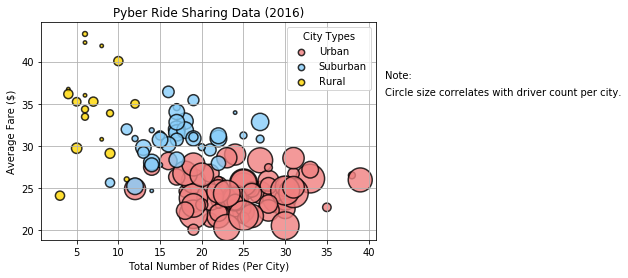

In [39]:
# Create Tables for City Types - Urban, Suburban and Rural
urban_city = combined_pyber_df.loc[combined_pyber_df["type"] == "Urban"]
suburban_city = combined_pyber_df.loc[combined_pyber_df["type"] == "Suburban"]
rural_city = combined_pyber_df.loc[combined_pyber_df["type"] == "Rural"]


# Using GroupBy in order to separate the data into fields according to "city"
# Average Fare, Total Rides and Total Drivers for Urban cities
avg_fare_urban = urban_city.groupby("city")["fare"].mean()
total_rides_urban = urban_city.groupby("city")["ride_id"].count()
total_drivers_urban = urban_city.groupby("city")["driver_count"].mean()

# Average Fare, Total Rides and Total Drivers for Suburban cities
avg_fare_suburban = suburban_city.groupby("city")["fare"].mean()
total_rides_suburban = suburban_city.groupby("city")["ride_id"].count()
total_drivers_suburban = suburban_city.groupby("city")["driver_count"].mean()

# Average Fare, Total Rides and Total Drivers for Rural cities
avg_fare_rural = rural_city.groupby("city")["fare"].mean()
total_rides_rural = rural_city.groupby("city")["ride_id"].count()
total_drivers_rural = rural_city.groupby("city")["driver_count"].mean()

# Obtain the x and y coordinates for each of the three city types
x_axis_urban = avg_fare_urban
y_axis_urban = total_rides_urban
s_axis_urban = total_drivers_urban

x_axis_suburban = avg_fare_suburban
y_axis_suburban = total_rides_suburban
s_axis_suburban = total_drivers_suburban

x_axis_rural = avg_fare_rural
y_axis_rural = total_rides_rural 
s_axis_rural = total_drivers_rural

# Build the scatter plots for each city types
plt.scatter(total_rides_urban, avg_fare_urban, s = total_drivers_urban*12,
            facecolors ="lightcoral", edgecolors="black", alpha = 0.8, linewidth = 1.5, label="Urban")

plt.scatter(total_rides_suburban, avg_fare_suburban, s = total_drivers_suburban*12,
            facecolors ="lightskyblue", edgecolors="black", alpha = 0.8, linewidth = 1.5, label="Suburban")

plt.scatter(total_rides_rural, avg_fare_rural, s = total_drivers_rural*12,
            facecolors ="gold", edgecolors="black", alpha = 0.8, linewidth = 1.5, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Create a legend
legend = plt.legend(loc= "upper right", scatterpoints=1, fontsize=10)
legend.set_title('City Types')
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(42, 38,"Note:")
plt.text(42, 36,"Circle size correlates with driver count per city.")
plt.grid()

# Save Figure
plt.savefig("../Images/Pyber.png")

# Show plot
plt.show()


## Total Fares by City Type

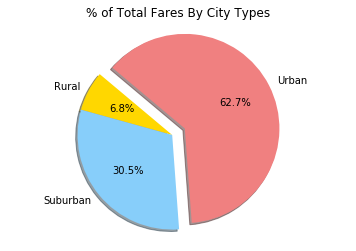

In [40]:
# % of Total Fares by City Type
total_fare_city = combined_pyber_df.groupby("type")["fare"].sum()

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .15)

# Creates the pie chart
# Automatically finds the percentages of each part of the pie chart

plt.title("% of Total Fares By City Types", fontsize = 12)
plt.pie(total_fare_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Pie Total Fare.png")

# Show Figure
plt.show()

In [41]:
# Show Figure
plt.show()

## Total Rides by City Type

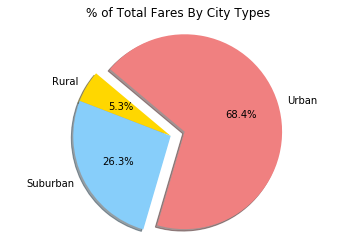

In [60]:
# % of Total Rides by City Type
total_rides_city = combined_pyber_df.groupby("type")["ride_id"].count()

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .15)

# Creates the pie chart
# Automatically finds the percentages of each part of the pie chart

plt.title("% of Total Fares By City Types", fontsize = 12)
plt.pie(total_rides_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Pie Total Ride.png")

# Show Figure
plt.show()

In [43]:
# Show Figure
plt.show()

## Total Drivers by City Type

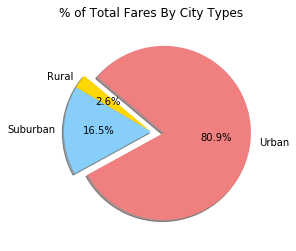

In [58]:
# % of Total Drivers by City Type
total_drivers_city = pyber_read_city_df.groupby("type")["driver_count"].sum()

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban" ]

# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, .15)

# Creates the pie chart
# Automatically finds the percentages of each part of the pie chart

plt.title("% of Total Fares By City Types", fontsize = 12)
plt.pie(total_drivers_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)


# Save Figure
plt.savefig("../Images/Pie Total Drivers.png")

# Show Figure
plt.show()

